# Introduction

So far we've been looking at the data we'll use for the Multiple Linear Regression (MLR) model and whether it meets the assumptions for normality.

In this paractical I'm going to build the model using the data from the dataset and then evaluate the importance of each variable and its contribution to the overall accuracy of the model.

First I need to convert the `state.x77` matrix. I'm also going to add a new variable called `name` because I'll need this to show individual outliers in the data further on in this practical.

In [269]:
states <- as.data.frame(state.x77)

In [270]:
# Add the states name as a variable
states$name <- state.name

In [271]:
head(states)

,Population,Income,Illiteracy,Life Exp,Murder,HS Grad,Frost,Area,name
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Alabama,3615,3624,2.1,69.05,15.1,41.3,20,50708,Alabama
Alaska,365,6315,1.5,69.31,11.3,66.7,152,566432,Alaska
Arizona,2212,4530,1.8,70.55,7.8,58.1,15,113417,Arizona
Arkansas,2110,3378,1.9,70.66,10.1,39.9,65,51945,Arkansas
California,21198,5114,1.1,71.71,10.3,62.6,20,156361,California
Colorado,2541,4884,0.7,72.06,6.8,63.9,166,103766,Colorado


Next i'm amending the `Life Exp` and `HS Grad` variable names as they contain spaces and will cause issues when I'm referring to them in R code.

In [272]:
colnames(states)[colnames(states) == "Life Exp"] <- "Life_Exp"
colnames(states)[colnames(states) == "HS Grad"] <- "HS_Grad"

And in the previous practical session I identified that `Area` was irrelevant to the model so I'm removing it.

In [273]:
states <- subset(states, select = -c(Area))

Models for `lm` are specified symbolically. A typical model has the form **response ~ terms** where `response` is the (numeric) **response** vector and **terms** is a series of terms which specifies a linear `predictor` for response. 

The distinction between explanatory and response variables is similar to another classification. Sometimes we refer to variables as being independent or dependent. 

The value of a dependent variable relies upon that of an independent variable. Thus a `response` variable corresponds to a dependent variable while an `explanatory` variable corresponds to an independent variable.

## Training and testing datasets

Just as I demonstrated in the linear regression practical session, we need to use some observations to validate our results. This means that our data will be split into two different groups:<br>

**Training data**<br>
**testing data**

Training data is used to extract knowledge and learn the relationship among variables. We use the `sample()` function which takes as input a list of numbers which go from 1 to the total number of observations in the data with complete cases. We specify the number of observations that will be picked for the training data as around 70% of the total number of observations available, and use the `replace = FALSE` command to specify that the picked observations may not be duplicated (by avoiding
a sample with replacement).

The testing data is composed of the remaining 30% of the observations. Since `sample` is a `Boolean` vector that contains a `TRUE` or `FALSE` value for each observation to specify whether or not it should be included, respectively, we can negate the vector to pick the other part of the data by prepending a minus sign (-) to the binary vector, effectively making every `TRUE` value a `FALSE` value, and vice versa.

If we did this process various times, we would find that every time we get different samples for the training and testing sets, and this may confuse us about our results. This is because the `sample()` function is stochastic, meaning that it will use pseudo random number generator to make the selection for us. If we want our process to be reproducible, meaning that, every time we run it the exact same samples are selected, then we must specify an initial seed before applying this process to precondition the pseudo random number generator. 

To do so, we need to pass an integer to the `set.seed()` function, as we do at the beginning of the code below. The seed argument must stay fixed to reproduce the same samples, and with it in place, every time we generate a random sample, we will get the same sample so that our results are reproducible.

To understand this, let's look at the following code:

In [274]:
set.seed(1)
no_rows_data <- nrow(states)
sample <- sample(1:no_rows_data, size = round(0.7 * no_rows_data), replace = FALSE)

training_data <- states[sample, ]
testing_data <- states[-sample, ]

## Building the MLR model
Before we can make any predictions, we need to specify a model and train it with our training data (training_data) so that it learns how to provide us with the predictions we're looking for. 

This means that we will solve an optimisation problem that outputs certain numbers that will be used as parameters for our model's predictions. R makes it very easy for us to accomplish such a task.

The standard way of specifying a linear regression model in R is using the `lm()` function with the model we want to build expressed as a formula and the data that should be used, and save it into an object (in this case `fit`) that we can use to explore the results in detail.

In [275]:
fit <- lm(Murder ~ Population + Illiteracy + Income + Frost + Life_Exp + HS_Grad, data=training_data)

In this model, we would let R know that we want to run a regression where we try
to explain the `Murder` response variable using the `Population`, `Illiteracy`, `Income` and `Frost` variables in the data.

### MLR model evaluation
Lets examine the results of the model in detail using the `summary()` function.

In [276]:
summary(fit)


Call:
lm(formula = Murder ~ Population + Illiteracy + Income + Frost + 
    Life_Exp + HS_Grad, data = training_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.6921 -1.0315 -0.1722  0.9987  3.3536 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.221e+02  2.437e+01   5.011 2.69e-05 ***
Population   3.242e-04  8.487e-05   3.820 0.000679 ***
Illiteracy   1.185e+00  8.493e-01   1.395 0.173971    
Income      -5.753e-04  8.025e-04  -0.717 0.479403    
Frost       -1.082e-02  7.873e-03  -1.375 0.180109    
Life_Exp    -1.625e+00  3.635e-01  -4.472 0.000117 ***
HS_Grad      2.209e-02  6.503e-02   0.340 0.736662    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.618 on 28 degrees of freedom
Multiple R-squared:  0.8642,	Adjusted R-squared:  0.835 
F-statistic: 29.69 on 6 and 28 DF,  p-value: 6.672e-11


When there’s more than one predictor variable, the regression coefficients indicate the increase in the dependent variable for a unit change in a predictor variable, assuming all other predictor variables remain constant. 

For example, the regression coefficient for `Population` is **3.24**, suggesting that an increase of 1% in illiteracy is associated with a 3.24% increase in the murder rate, controlling for Illiteracy, income, temperature, life expectancy and high school grade.

The coefficient is significantly different from zero at the **p < .0001** level. 

The coefficient for `Frost`, `income` and `HS_Grad` aren’t significantly different from zero **(p = 0.18),(p = 0.47) and (p = 0.73)** suggesting that `Frost`, `income`, `HS_Grad` and `Murder` aren’t linearly related when controlling for the other predictor variables. Population, Illiteracy, Life_Exp are showing a linear relationship.

The coefficient of determination (R-squared) is a statistical metric that is used to measure how much of the variation in outcome (response) can be explained by the variation in the predictor variables. R2 always increases as more predictors are added to the MLR model even though the predictors may not be related to the outcome variable.
 
R2 by itself can't thus be used to identify which predictors should be included in a model and which should be excluded. R2 can only be between 0 and 1, where 0 indicates that the outcome cannot be predicted by any of the predictor variables and 1 indicates that the outcome can be predicted without error from the independent variables.

All of the predictor variables account for 86% of the variance in murder rates across states. This is indicated by the `Multiple R-squared` value.

Up to this point, we’ve assumed that the predictor variables don’t interact.

## Model summary

We've used the `lm()` function to fit an OLS regression model and the `summary(`) function to obtain the model parameters and summary statistics.

Unfortunately, nothing in this output tells us whether the model we’ve fit is appropriate. Our confidence in inferences about regression parameters depends on the degree to which we’ve met the statistical assumptions of the OLS model. 

Although the `summary()` function describes the model, it provides no information concerning the degree to which you’ve satisfied the statistical assumptions underlying the model.

Why is this important? Irregularities in the data or misspecifications of the relationships between the predictors and the response variable can lead you to settle on a model that’s wildly inaccurate. On the one hand, you may conclude that a predictor and a response variable are unrelated when, in fact, they are. On the other hand, you
may conclude that a predictor and a response variable are related when, in fact, they aren’t! 

We may also end up with a model that makes poor predictions when applied in real-world settings, with significant and unnecessary error.

Let’s look at the output from the `confint()` function.

In [277]:
confint(fit)

,2.5 %,97.5 %
(Intercept),72.1886900893,1.720228e+02
Population,0.0001503752,4.980863e-04
Illiteracy,-0.5548936473,2.924488e+00
Income,-0.0022191652,1.068594e-03
Frost,-0.0269489874,5.303320e-03
Life_Exp,-2.3697797855,-8.807803e-01
HS_Grad,-0.1111259148,1.553015e-01


The results suggest that you can be 95% confident that the interval [0, 4.98] contains the true change in `murder` rate for a 1% change in `illiteracy` rate. 

## Regression diagnostics
But your faith in these results is only as strong as the evidence you have that your data satisfies
the statistical assumptions underlying the model.

A set of techniques called **regression diagnostics** provides the necessary tools for evaluating the appropriateness of the regression model and can help you to uncover and correct problems. 

We’ll use methods available through the `car` package to do this analysis.

## Normality and studentized residuals
The `qqPlot()` function plots the **studentized residuals** (also called studentized deleted residuals or jackknifed residuals) against a t distribution with n – p – 1 degrees of freedom, where n is the sample size and p is the number of regression parameters (including the intercept). Dividing a statistic by a sample standard deviation is called studentizing, in analogy with **standardizing** and **normalizing**. 

A **studentized residual** is the quotient resulting from the division of a residual by an estimate of its standard deviation. It is a form of a Student's t-statistic, with the estimate of error varying between points. This is an important technique in the detection of outliers.

The key reason for studentizing is that in regression analysis of a multivariate distribution, the variances of the residuals at different input variable values may differ, even if the variances of the errors at these different input variable values are equal. The issue is the difference between errors and residuals in statistics, particularly the behavior of residuals in regressions.

### Studentized residuals example

Suppose there is a series of observations from a distribution and we want to estimate the mean of that distribution. In this case, the errors are the deviations of the observations from the population mean, while the residuals are the deviations of the observations from the sample mean.

A statistical error is the amount by which an observation differs from its expected value, the latter being based on the whole population from which the statistical unit was chosen randomly. For example, if the mean height in a population of 21-year-old men is 1.75 metres, and one randomly chosen man is 1.80 metres tall, then the **error** is 0.05 metres.

If the randomly chosen man is 1.70 metres tall, then the **error** is −0.05 metres. The expected value, being the mean of the entire population, is typically unobservable, and hence the statistical error cannot be observed either.

Alternatively, a residual (or fitting deviation) is an observable estimate of the unobservable statistical error. Consider the previous example with men's heights and suppose we have a random sample of n people. The sample mean could serve as a good estimator of the population mean. Then we have:

The difference between the height of each man in the sample and the unobservable population mean is a statistical error, whereas 
The difference between the height of each man in the sample and the observable sample mean is a residual.

Note that, because of the definition of the sample mean, the sum of the residuals within a random sample is necessarily zero, and thus the residuals are necessarily not independent. The statistical errors, on the other hand, are independent, and their sum within the random sample is almost surely not zero.

One can standardize statistical errors (especially of a normal distribution) in a z-score (or "standard score"), and standardize residuals in a t-statistic, or more generally studentized residuals. 


Let's analyse our model.

Alabama Colorado 
       3       24

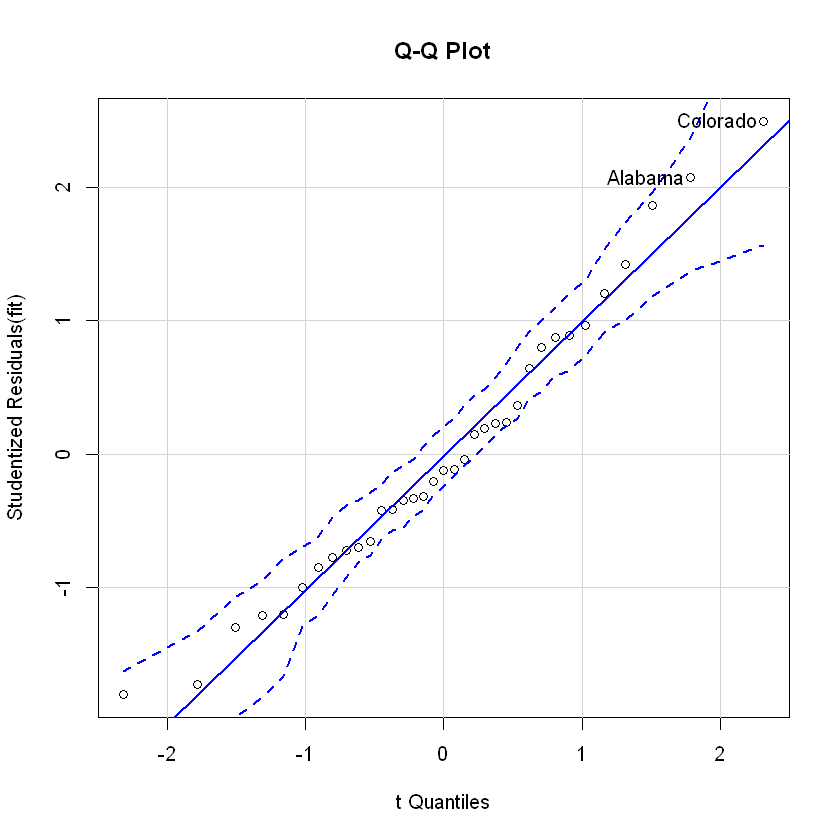

In [278]:
library(car)
qqPlot(fit, labels=row.names(states), id.method="identify", simulate=TRUE, main="Q-Q Plot")

The `qqPlot()` function generates the probability plot. The option `d.method ="identify"`makes the plot interactive— after the graph is drawn. Clicking on points in the graph will label them with values specified in the labels option of the function. 

Here, I identified **Alabama** and **Colorado**. When `simulate=TRUE` is specified in the `qqplot()` function, a 95% confidence envelope is produced using a parametric bootstrap.

With the exception of `Alabama` and `Colorado`, all the points fall close to the line and are within the confidence envelope, suggesting that we’ve met the normality assumption fairly well.

But you should definitely look at both these points. They both have a large positive residual (actual – predicted), indicating that the model underestimates the murder rate in these states.

Lets examine this data in more detail.

In [279]:
training_data["Alabama",]
training_data["Colorado",]

,Population,Income,Illiteracy,Life_Exp,Murder,HS_Grad,Frost,name
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Alabama,3615,3624,2.1,69.05,15.1,41.3,20,Alabama


,Population,Income,Illiteracy,Life_Exp,Murder,HS_Grad,Frost,name
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Colorado,2541,4884,0.7,72.06,6.8,63.9,166,Colorado


The `fitted()` function extracts fitted values from objects returned by modeling functions. It returns the predicted murder rate for a particular state.

In [280]:
fitted(fit)["Alabama"]
fitted(fit)["Colorado"]

Alabama 
12.15125

Colorado 
3.446404

These results tell us that the murder rate in Alabama is 15.1%, but the model predicts a 12.15% murder rate. and for Colorado, the murder rate is 6.8% and the model predicts 3.44%. `Colorado` seems a lot worse than `Alabama`.

We can view these errors using a histogram. This code generates a histogram of the studentized residuals and superimposes a normal curve, kernel-density curve, and rug plot. 

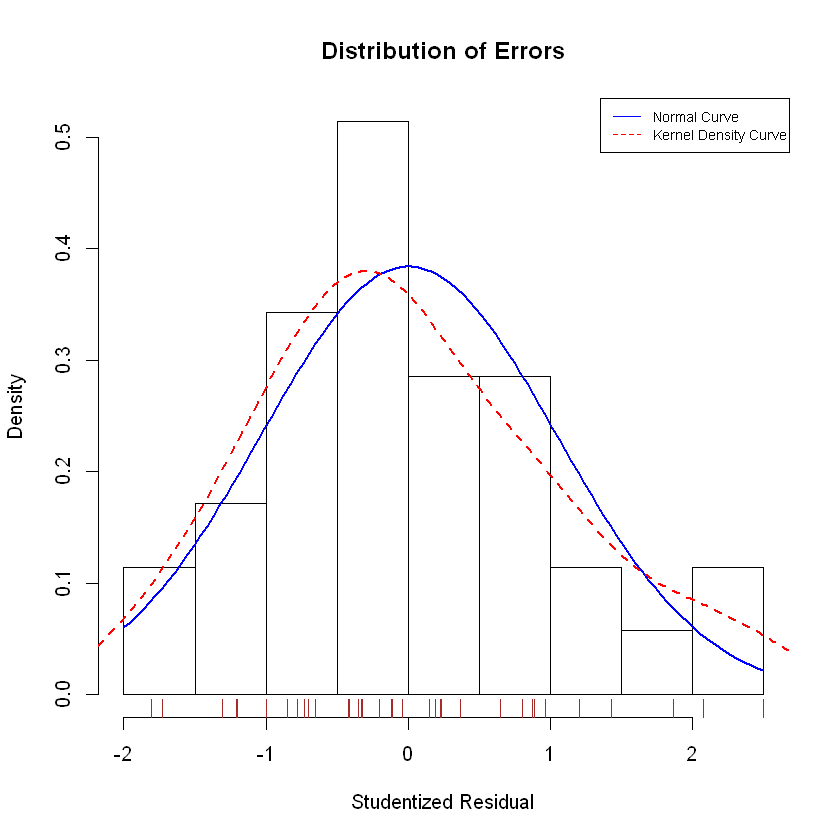

In [281]:
student_fit <- rstudent(fit)
hist(student_fit, 
     breaks=10, 
     freq=FALSE, 
     xlab="Studentized Residual", 
     main="Distribution of Errors")

rug(jitter(student_fit), col="brown")

curve(dnorm(x, mean=mean(student_fit), sd=sd(student_fit)), add=TRUE, col="blue", lwd=2)

lines(density(student_fit)$x, density(student_fit)$y, col="red", lwd=2, lty=2)

legend("topright", legend = c( "Normal Curve", "Kernel Density Curve"), lty=1:2, col=c("blue","red"), cex=.7)

As you can see, the errors follow a normal distribution quite well, with the exception of 1 outlier on the right of the chart (outside the +2 boundary). The Q-Q plot is probably more informative in terms of displaying outliers.

Outliers are observations that aren’t predicted well by the model. They have unusually large positive or negative residuals. Positive residuals indicate that the model is underestimating the response value, whereas negative residuals indicate an overestimation.

You’ve already seen one way to identify outliers through the Q-Q plot chart (above). Points in the Q-Q plot 
that lie outside the confidence band are considered outliers. 

A rough rule is that standardized residuals that are larger than 2 or less than –2 are worth attention.

As you can see in this chart, the errors follow a normal distribution quite well, with the exception of 2 outliers on the right of the chart. The Q-Q plot is probably more informative in terms of displaying outliers.

The `car` package also provides a statistical test for outliers. The `outlierTest()` function reports the Bonferroni adjusted p-value for the largest absolute studentized residual:

See http://math.furman.edu/~dcs/courses/math47/R/library/car/html/outlier.test.html for futerh information.

In [282]:
library(car)
outlierTest(fit)

No Studentized residuals with Bonferroni p < 0.05
Largest |rstudent|:
         rstudent unadjusted p-value Bonferroni p
Colorado 2.496269           0.018955      0.66342

Here, we see that `Colorado` is identified as an outlier. Note that this function tests the single largest (positive or negative) residual for significance as an outlier. Therefore we'll need to re-run the test once we've removed `Colorado`.

If it isn’t significant, there are no outliers in the dataset. If it’s significant, you must delete it and rerun the test to see if others are present.

Now I'm going to delete the **Colorado** outlier record and then re-run the test.

I'll need to do the following:
 - Delete Colorado from the main `states` dataset
 - Split the data into training and testing again
 - Rebuild the model from the modified training data

In [283]:
# Remove Colorado state record
# from states dataset
states <- subset(states, states$name != "Colorado")

Split the data into training and testing again.

In [284]:
# Split data into training and testing
set.seed(1)
no_rows_data <- nrow(states)
sample <- sample(1:no_rows_data, size = round(0.7 * no_rows_data), replace = FALSE)

training_data <- states[sample, ]
testing_data <- states[-sample, ]

Then rebuild the MLR model again.

In [285]:
fit <- lm(Murder ~ Population + Illiteracy + Income + Frost + Life_Exp + HS_Grad, data=training_data)

And now I'm re-running the outlier test. 

In [286]:
outlierTest(fit)

No Studentized residuals with Bonferroni p < 0.05
Largest |rstudent|:
       rstudent unadjusted p-value Bonferroni p
Maine -1.953061           0.061654           NA

This test now shows that `Maine` could be an outlier. `Alabama` is no longer recognised as an outlier. Therefore I'm goign to proceed and not remove `Maine` from the dataste.

The outlier is now removed. I'm now re-running the histogram of the studentized residuals and superimposes a normal curve, kernel-density curve, and rug plot. 

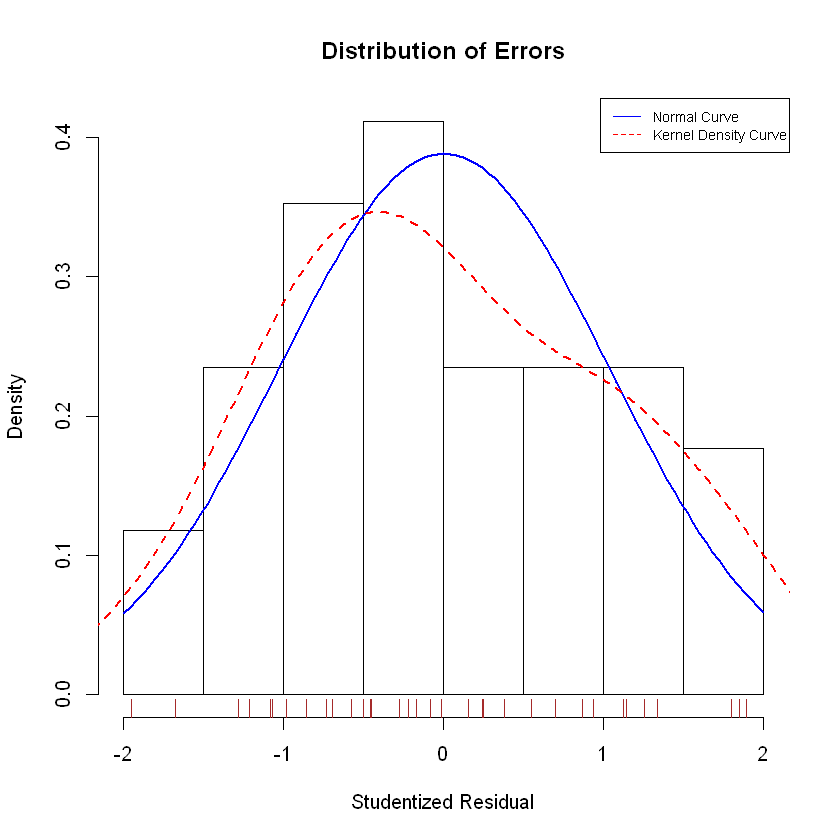

In [287]:
student_fit <- rstudent(fit)
hist(student_fit, 
     breaks=10, 
     freq=FALSE, 
     xlab="Studentized Residual", 
     main="Distribution of Errors")

rug(jitter(student_fit), col="brown")

curve(dnorm(x, mean=mean(student_fit), sd=sd(student_fit)), add=TRUE, col="blue", lwd=2)

lines(density(student_fit)$x, density(student_fit)$y, col="red", lwd=2, lty=2)

legend("topright", legend = c( "Normal Curve", "Kernel Density Curve"), lty=1:2, col=c("blue","red"), cex=.7)

The plot now suggests that the outliers have been removed.

## Linearity
You can look for evidence of nonlinearity in the relationship between the dependent variable and the independent variables by using component plus residual plots (also known as partial residual plots). 

The plot is produced by the `crPlots()` function in the `car` package. You’re looking for any systematic departure from the linear model that would be represented by a sharp deviation from the linear line on each chart.

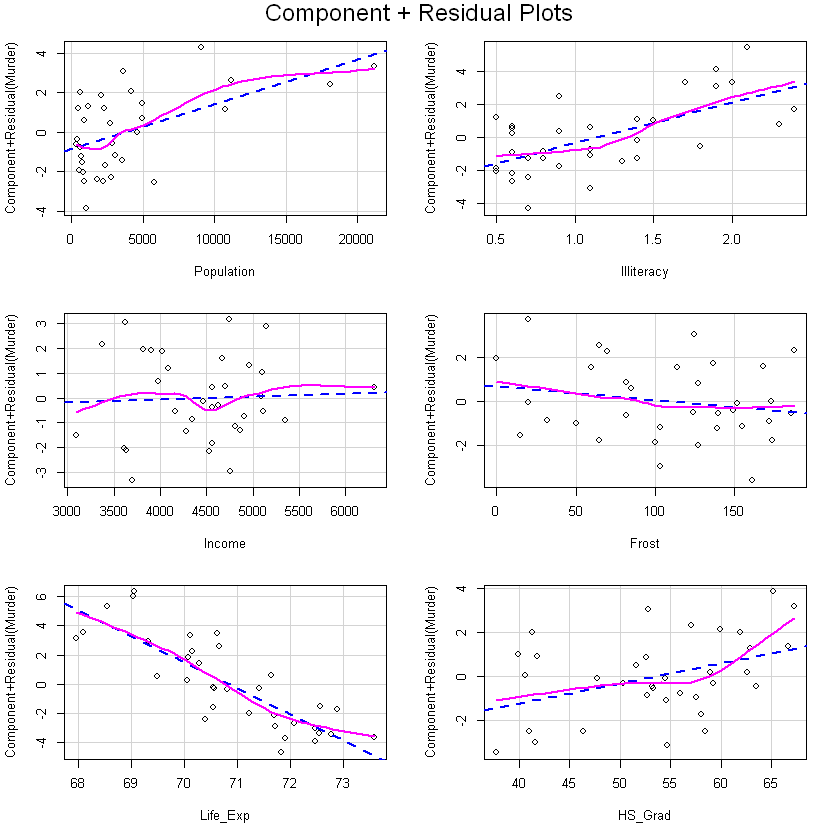

In [288]:
crPlots(fit)

### Influential observations
Influential observations have a disproportionate impact on the values of the model parameters. Imagine finding that your model changes dramatically with the removal of a single observation. It’s this concern that leads you to examine your data for influential 
points.
There are two methods for identifying influential observations: Cook’s distance (or D statistic) and added variable plots. 

Roughly speaking, Cook’s D values greater than 4/(n – k – 1), where n is the sample size and k is the number of predictor variables, indicate influential observations. You can create a Cook’s D plot like this:

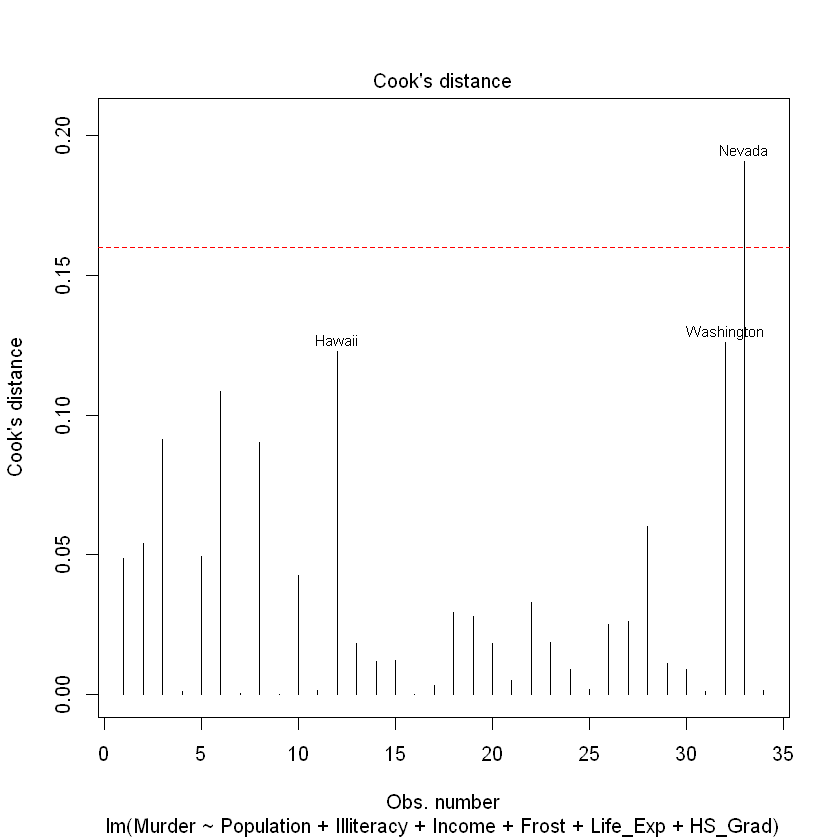

In [289]:
cutoff <- 4/(nrow(training_data) - length(fit$coefficients) - 2)
plot(fit, which = 4, cook.levels = cutoff)
abline(h = cutoff, lty = 2, col = "red")

The chart suggest that `Nevada` could be an influencial observation in the data. Any points above the red cut-off line indicate records above that are influencial observations. Generally, a cutoff of 1 is more reasonable, and therefore I'm ignoring the `Nevada` record.

Cook’s D plots can help identify influential observations, but they don’t provide information about how these observations affect the model. 

Added-variable plots can help in this regard. For one response variable and k predictor variables, you’d create k
added-variable plots as follows.

For each predictor Xk, plot the residuals from regressing the response variable on the other k – 1 predictors versus the residuals from regressing Xk on the other k – 1 predictors. Added-variable plots can be created using the `avPlots()` function in the car package:

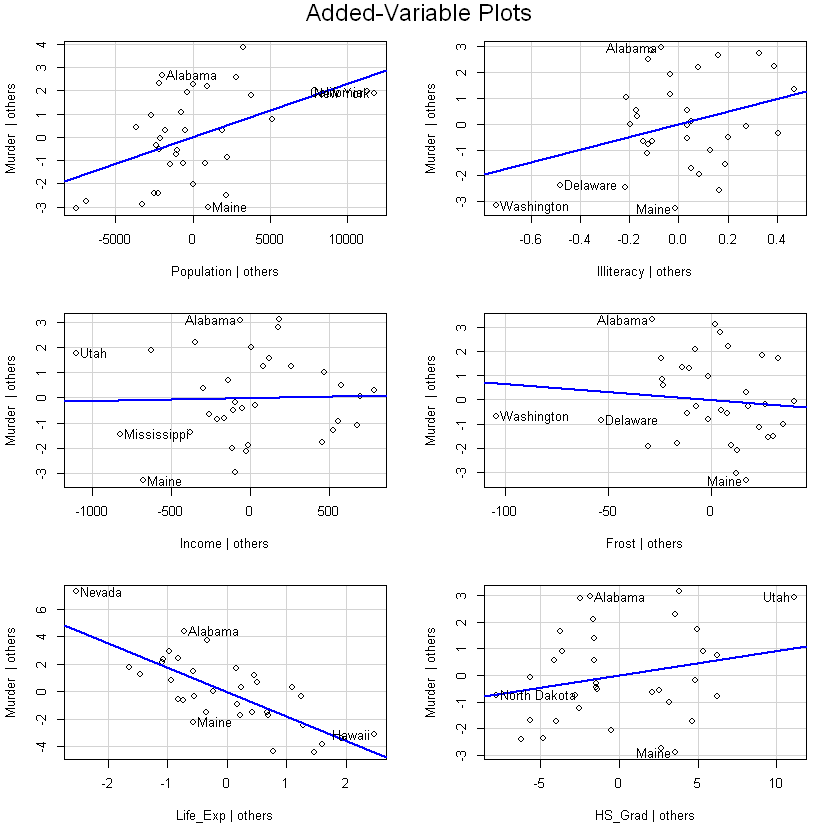

In [290]:
#library(car)
avPlots(fit, ask=FALSE)

The straight line in each plot is the actual regression coefficient for that predictor variable. For example, the chart in the top right shows data for the `Illiteracy` variable. 

You can see the impact of influential observations by imagining how the line would change if the point representing that observation was deleted. For example, in the **Frost | others** chart, if I remove the `Washington` record then the stright line would become more linear.

### Influence plot
We can combine the information from outlier, leverage, and influence plots into one highly informative plot using the `influencePlot()` function from the car package. Here's an example of code to do this.

,StudRes,Hat,CookD
,<dbl>,<dbl>,<dbl>
Alabama,1.8929461,0.1633673,0.091227696
Maine,-1.9530614,0.1544834,0.090163412
Hawaii,0.9374836,0.4937311,0.122996054
Alaska,0.1543445,0.5941719,0.005169483
Washington,-0.9857404,0.4754373,0.125944332
Nevada,1.8459168,0.2993280,0.190926279


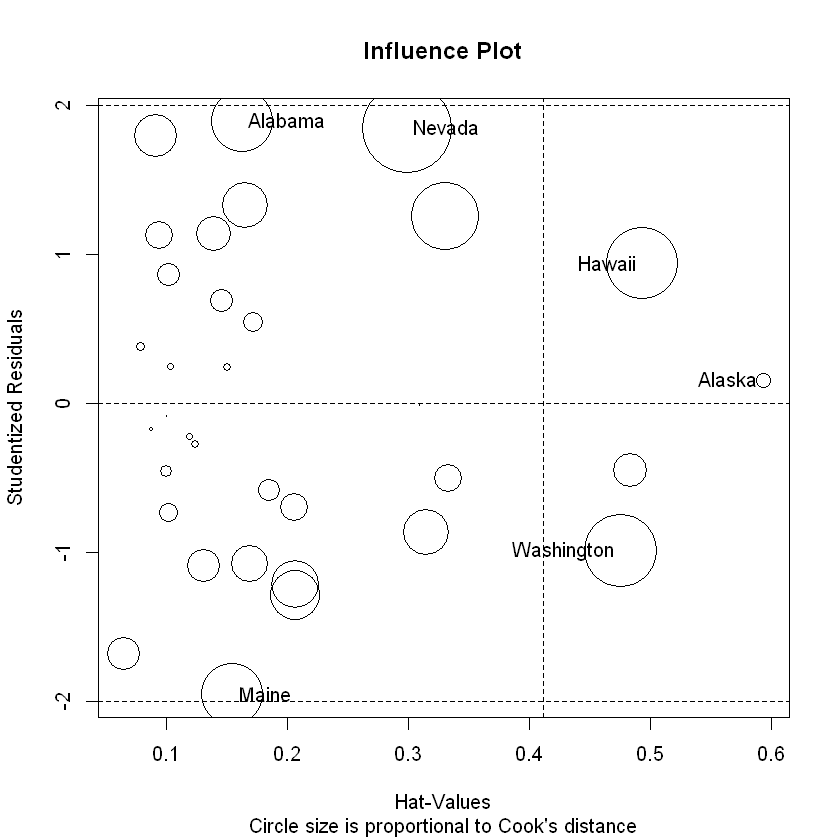

In [291]:
library(car)
influencePlot(fit, main="Influence Plot",
sub="Circle size is proportional to Cook's distance")

The influence plot shows that **Alabama** and **Maine** are very close to the -2 to 2 boundary and so could be outliers.

Alaska has high leverage. and Nevada, Washington, Hawaii are influential observations.

## Homoscedasticity

Homoscedasticity simply means that we need the data to have constant variance in our residuals.

The car package also provides two useful functions for identifying non-constant error variance. 

The `ncvTest()` function produces a score test of the hypothesis of constant error variance against the alternative that the error variance changes with the level of the fitted values. 

A significant result suggests heteroscedasticity (nonconstant error variance).

In [292]:
ncvTest(fit)

Non-constant Variance Score Test 
Variance formula: ~ fitted.values 
Chisquare = 0.5649101, Df = 1, p = 0.45229

The score test is nonsignificant (p = 0.45229), suggesting that we’ve met the constant variance assumption. If the p value is significant (p < 0.05), we would assume that the error variance changes with the level of the fitted values. 

The `spreadLevelPlot()` function creates a scatter plot of the absolute standardized residuals versus the fitted values and superimposes a line of best fit.

The points form a random horizontal band around a horizontal line of best fit. If you’d violated the assumption, you’d expect to see a nonhorizontal line. 

The suggested power transformation in this chart is the suggested power p (Y<sup>p</sup>) that would stabilise the nonconstant error variance. 

For example, if the plot shows a non-horizontal trend and the suggested power transformation is 0.5, then using the **square root of Y** rather than Y in the regression equation might lead to a model that satisfied homoscedasticity. 

If the suggested power is 0, you should use a **log transformation**. 

In this example, it seesm that a transformation is required as the power transform value is 0.43. 


Suggested power transformation:  0.4302846 

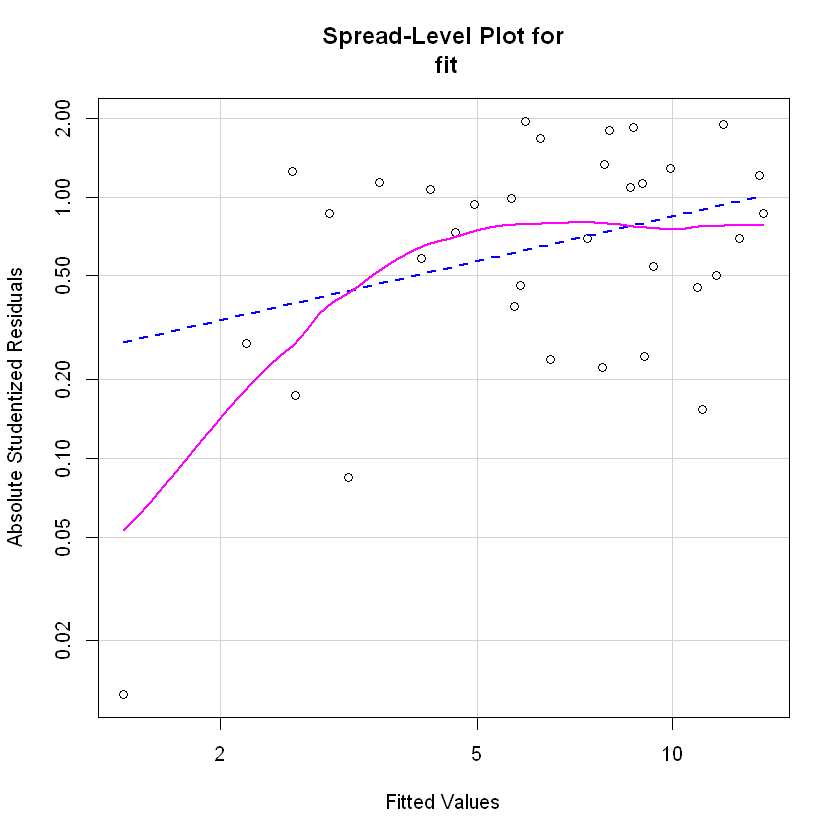

In [293]:
spreadLevelPlot(fit)

## Global validation of linear model assumption
Finally, let’s examine the `gvlma()` function in the gvlma package. Written by Pena and Slate (2006), the `gvlma()` function performs a global validation of linear model assumptions as well as separate evaluations of skewness, kurtosis, and heteroscedasticity.

In other words, it provides a single omnibus (go/no go) test of model assumptions.

The following listing applies the test to the states data.

In [294]:
library(gvlma)
gvmodel <- gvlma(fit)
summary(gvmodel)


Call:
lm(formula = Murder ~ Population + Illiteracy + Income + Frost + 
    Life_Exp + HS_Grad, data = training_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.2224 -1.2884 -0.2364  1.2507  3.1189 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.249e+02  2.219e+01   5.627 5.68e-06 ***
Population   2.272e-04  8.275e-05   2.746   0.0106 *  
Illiteracy   2.447e+00  1.349e+00   1.813   0.0809 .  
Income       1.186e-04  7.492e-04   0.158   0.8754    
Frost       -6.392e-03  1.145e-02  -0.558   0.5812    
Life_Exp    -1.780e+00  2.969e-01  -5.996 2.14e-06 ***
HS_Grad      9.149e-02  7.384e-02   1.239   0.2260    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.886 on 27 degrees of freedom
Multiple R-squared:  0.8066,	Adjusted R-squared:  0.7637 
F-statistic: 18.77 on 6 and 27 DF,  p-value: 1.756e-08


ASSESSMENT OF THE LINEAR MODEL ASSUMPTIONS
USING THE GLOBAL TEST ON 4 DEGREES-OF-FREEDOM:
Lev

You can see from the output (the Global Stat line) that the data meet all the statistical assumptions that go with the OLS regression model (p = 0.8128). 

If the decision line indicated that the assumptions were violated (say, p < 0.05), you’d have to explore the
data using the previous methods discussed in this practical session to determine which assumptions were the culprit.

### Multicollinearity
Before completing regression diagnostics, let’s focus on a problem that’s not directly related to statistical assumptions but is important in allowing you to interpret multiple regression results. 

Imagine you’re conducting a study of grip strength. Your independent variables include date of birth (DOB) and age. You regress grip strength on DOB and age and find a significant overall F test at p < .001. But when you
look at the individual regression coefficients for DOB and age, you find that they’re both nonsignificant (that is, there’s no evidence that either is related to grip strength). 

What happened?

The problem is that DOB and age are perfectly correlated within rounding error. A regression coefficient measures the impact of one predictor variable on the response variable, holding all other predictor variables constant. 

This amounts to looking at the relationship of grip strength and age, holding age constant. The problem is called
multicollinearity. It leads to large confidence intervals for model parameters and makes the interpretation of individual coefficients difficult.

Multicollinearity can be detected using a statistic called the **variance inflation factor (VIF)**. For any predictor variable, the square root of the VIF indicates the degree to which the confidence interval for that variable’s regression parameter is expanded relative to a model with uncorrelated predictors (hence the name). 

VIF values are provided by the `vif()` function in the `car` package. As a general rule, indicates a multicollinearity problem.

In [295]:
library(car)
vif(fit)

Population Illiteracy     Income      Frost   Life_Exp    HS_Grad 
    1.5143     5.5429     2.2291     3.5351     1.6891     3.5467

In [296]:
# We can check whether any of the variables indicate a multicollinearity problem
# if the value > 2 
sqrt(vif(fit)) > 2

Population Illiteracy     Income      Frost   Life_Exp    HS_Grad 
     FALSE       TRUE      FALSE      FALSE      FALSE      FALSE

## Transforming variables
When MLR model doesn't meet the normality, linearity, or homoscedasticity assumptions, transforming one or more variables can often improve or correct the situation. 

Transformations typically involve replacing a variable Y with Y<sup>λ</sup>. Common values of λ and
their interpretations are given in table below. If Y is a proportion, a logit transformation
**(ln (Y/1-Y))** is often used.

When the model violates the normality assumption, you typically attempt a transformation of the response variable. In this example, we would transform the `murder` variable if a transformation is required.


| Lamda | -2 | -1 | -0.5 | 0 | 0.5 | 1 | 2|
|-------|----|----|------|---|-----|---|--|
| Transformation | 1/y2 | 1/Y | 1/ sqrt Y | log(Y) | sqrt (Y) | None | y^ |

We can use the `powerTransform()` function in the `car` package to generate a maximum-likelihood estimation of the power λ most likely to normalize the variable X<sup>λ</sup>. 

The powerTransform() determines the optimal power at which you should raise the outcome variable (in this case, Murder) prior to including it in a linear regression model. The optimal power is denoted by lambda, so Murder^lambda becomes the transformed outcome variable.

See https://www.rdocumentation.org/packages/asremlPlus/versions/4.2-18/topics/powerTransform

Here is how we apply this to the states training data.

In [326]:
library(car)
summary(powerTransform(training_data$Murder))

bcPower Transformation to Normality 
                     Est Power Rounded Pwr Wald Lwr Bnd Wald Upr Bnd
training_data$Murder     0.483           1      -0.1102       1.0762

Likelihood ratio test that transformation parameter is equal to 0
 (log transformation)
                           LRT df  pval
LR test, lambda = (0) 2.689658  1 0.101

Likelihood ratio test that no transformation is needed
                           LRT df     pval
LR test, lambda = (1) 2.733523  1 0.098262

The results suggest that we can normalize the variable Murder by replacing it with Murder<sup>0.48</sup>. From examining the table above, we could apply a **square-root transformation** to improve the model’s fit to normality. 

And the hypothesis **Likelihood ratio test that no transformation is needed** shows that λ=1 cannot be rejected as it is more than the cutoff value (p = 0.098262). That means there's no strong evidence that a transformation is needed in this case. This is consistent with the results of the Q-Q plot and in the `spreadlevelplot()`.

The test suggests that I should convert the Murder variable by transforming it with the `sqrt(Y)`.

## Comparing models using AIC
You can compare the fit of several models using the `AIC()` function in the base installation.

I'm going to compare whether a `sqrt()` transform of the `Murder` response variable improves the overall model fit.



In [327]:
# Transform Murder varaible as indicated by spreadLevelPlot() function
sqrt_transform_murder <- sqrt(training_data$Murder)
training_data$Murder_sqrt <- sqrt_transform_murder

In [328]:
fit_model1 <- lm(Murder ~ Population + Illiteracy + Income + Frost + Life_Exp + HS_Grad, data=training_data)
fit_model2 <- lm(Murder_sqrt ~ Population + Illiteracy + Income + Frost + Life_Exp + HS_Grad, data=training_data)
AIC(fit_model1,fit_model2)

,df,AIC
,<dbl>,<dbl>
fit_model1,8,147.77668
fit_model2,8,37.90138


The AIC values suggest that the model with **transformed murder variable** response variable is the better model. The AIC approach does not need both models to contain the same predictor variables, they do not need to be nested. A nested model is one whose terms are completely included in the other model.

The index takes into account a model’s statistical fit and the number of parameters needed to achieve this fit. Models with smaller AIC values indicating adequate fit with fewer parameters are preferred. The comparison is provided by the `AIC()` function. In this example we can see that `fit_model2` is better than `fit_model1`.


Suggested power transformation:  0.8871907 

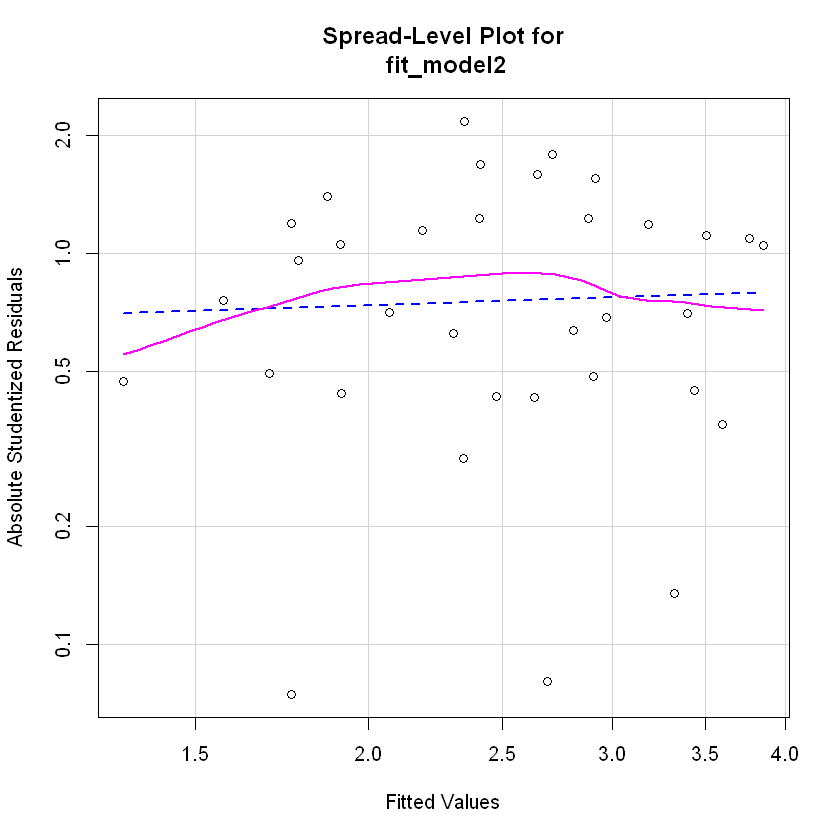

In [329]:
spreadLevelPlot(fit_model2)

## Comparing multiple models

Comparing two models is relatively straightforward, but what do you do when there are 4, or 10, or 100 possible models to consider?

We can apply two popular approaches to selecting a final set of predictor variables from a larger pool of candidate variables are **stepwise methods** and **all-subsets** regression

### STEPWISE REGRESSION
In stepwise selection, variables are added to or deleted from a model one at a time, until some stopping criteria is reached. 

For example, in forward stepwise regression, you add predictor variables to the model one at a time, stopping when the addition of variables would no longer improve the model. 

In backward stepwise regression, you start with a model that includes all predictor variables, and then you delete them one at a time until removing variables would degrade the quality of the model. 

In stepwise stepwise regression (usually called both to avoid sounding silly), you combine the forward and backward stepwise approaches. 

Variables are entered one at a time, but at each step, the variables in the model are reevaluated, and those that don’t contribute to the model are deleted. 

A predictor variable may be added to, and deleted from, a model several times before a final solution is reached.

The implementation of stepwise regression methods varies by the criteria used to enter or remove variables. The `stepAIC()` function in the `MASS` package performs stepwise model selection (forward, backward, or stepwise) using an exact AIC criterion. 

See https://www.rdocumentation.org/packages/MASS/versions/7.3-51.6/topics/stepAIC for more information.

In this code I'm applying **backward** stepwise regression to the problem.

In [338]:
library(MASS)
fit_test <- lm(Murder ~ Population + Illiteracy + Income + Frost + Life_Exp + HS_Grad, data=training_data)
stepAIC(fit_test, direction="backward")

Start:  AIC=49.29
Murder ~ Population + Illiteracy + Income + Frost + Life_Exp + 
    HS_Grad

             Df Sum of Sq     RSS    AIC
- Income      1     0.089  96.081 47.320
- Frost       1     1.108  97.101 47.679
- HS_Grad     1     5.457 101.449 49.169
<none>                     95.992 49.289
- Illiteracy  1    11.691 107.683 51.196
- Population  1    26.803 122.796 55.662
- Life_Exp    1   127.824 223.816 76.072

Step:  AIC=47.32
Murder ~ Population + Illiteracy + Frost + Life_Exp + HS_Grad

             Df Sum of Sq     RSS    AIC
- Frost       1     1.027  97.109 45.682
<none>                     96.081 47.320
- HS_Grad     1    11.257 107.339 49.087
- Illiteracy  1    14.332 110.413 50.048
- Population  1    34.428 130.510 55.733
- Life_Exp    1   129.102 225.184 74.279

Step:  AIC=45.68
Murder ~ Population + Illiteracy + Life_Exp + HS_Grad

             Df Sum of Sq     RSS    AIC
<none>                     97.109 45.682
- HS_Grad     1    13.855 110.964 48.217
- Population 


Call:
lm(formula = Murder ~ Population + Illiteracy + Life_Exp + HS_Grad, 
    data = training_data)

Coefficients:
(Intercept)   Population   Illiteracy     Life_Exp      HS_Grad  
  1.191e+02    2.503e-04    3.043e+00   -1.723e+00    1.066e-01  


We start with all 6 predictors in the model. For each step, the AIC column provides the model AIC resulting from the deletion of the variable listed in that row. 

The AIC value for <none> is the model AIC if no variables are removed. In the first step, `Income` is removed, decreasing the AIC from 49.29 to 47.32. 
    
In the second step, `Frost` is removed, decreasing the AIC to 45.68. Deleting any more variables would increase the AIC, so the process stops. The stepwise check suggests that **Population + Illiteracy + Life_Exp + HS_Grad** is the best combination of model.

Stepwise regression is controversial. Although it may find a good model, there’s no guarantee that it will find the “best” model. This is because not every possible model is evaluated. 
    
An approach that attempts to overcome this limitation is all subsets regression.

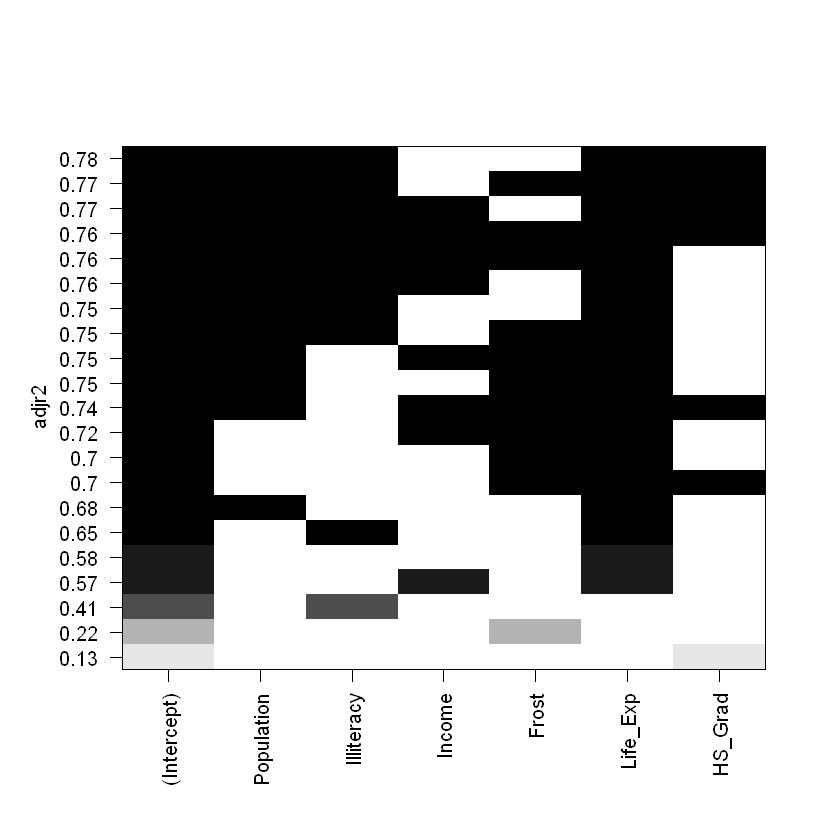

In [333]:
#library(leaps)
leaps <-regsubsets(Murder ~ Population + Illiteracy + Income + Frost + Life_Exp + HS_Grad, data=training_data, nbest=4)
plot(leaps, scale="adjr2")

This figure can be confusing to read. Looking at the first row (starting at the bottom), you can see that a model with the `intercept` and `HS_Grad` has an adjusted R-square of 0.13. 

A model with the `intercept` and `Frost` has an adjusted R-square of 0.22.

Jumping to the top row, a model with the `intercept`, `Population`, `Illiteracy`, `Life_Exp` and `HS_Grade` has an adjusted R-square of 0.78, whereas one with the `intercept`, `Population`, `Illiteracy`, `Frost`, `Life_Exp` and `HS_Grad` has an adjusted R-square of 0.78. 

Here you see that a model with `intercept`, `Population`, `Illiteracy`, `Life_Exp` and `HS_Grad` is the best. This correlates with the stepwise check.

Lets see how that works with the transformed `Murder` response variable.

In [339]:
library(MASS)
fit_test <- lm(Murder_sqrt ~ Population + Illiteracy + Income + Frost + Life_Exp + HS_Grad, data=training_data)
stepAIC(fit_test, direction="backward")

Start:  AIC=-60.59
Murder_sqrt ~ Population + Illiteracy + Income + Frost + Life_Exp + 
    HS_Grad

             Df Sum of Sq    RSS     AIC
- Income      1    0.0008 3.7919 -62.579
- Frost       1    0.1173 3.9084 -61.550
<none>                    3.7910 -60.586
- Illiteracy  1    0.3538 4.1448 -59.553
- HS_Grad     1    0.3900 4.1810 -59.257
- Population  1    1.0123 4.8034 -54.539
- Life_Exp    1    5.2607 9.0518 -32.996

Step:  AIC=-62.58
Murder_sqrt ~ Population + Illiteracy + Frost + Life_Exp + HS_Grad

             Df Sum of Sq    RSS     AIC
- Frost       1    0.1436 3.9355 -63.315
<none>                    3.7919 -62.579
- Illiteracy  1    0.3933 4.1852 -61.223
- HS_Grad     1    0.6442 4.4360 -59.244
- Population  1    1.2085 5.0004 -55.173
- Life_Exp    1    5.3670 9.1589 -34.596

Step:  AIC=-63.31
Murder_sqrt ~ Population + Illiteracy + Life_Exp + HS_Grad

             Df Sum of Sq    RSS     AIC
<none>                    3.9355 -63.315
- HS_Grad     1    0.8562 4.7917 -58


Call:
lm(formula = Murder_sqrt ~ Population + Illiteracy + Life_Exp + 
    HS_Grad, data = training_data)

Coefficients:
(Intercept)   Population   Illiteracy     Life_Exp      HS_Grad  
  2.453e+01    5.014e-05    6.122e-01   -3.426e-01    2.649e-02  


This suggest that again **Population + Illiteracy + Life_Exp + HS_Grad** is the best combination of model.

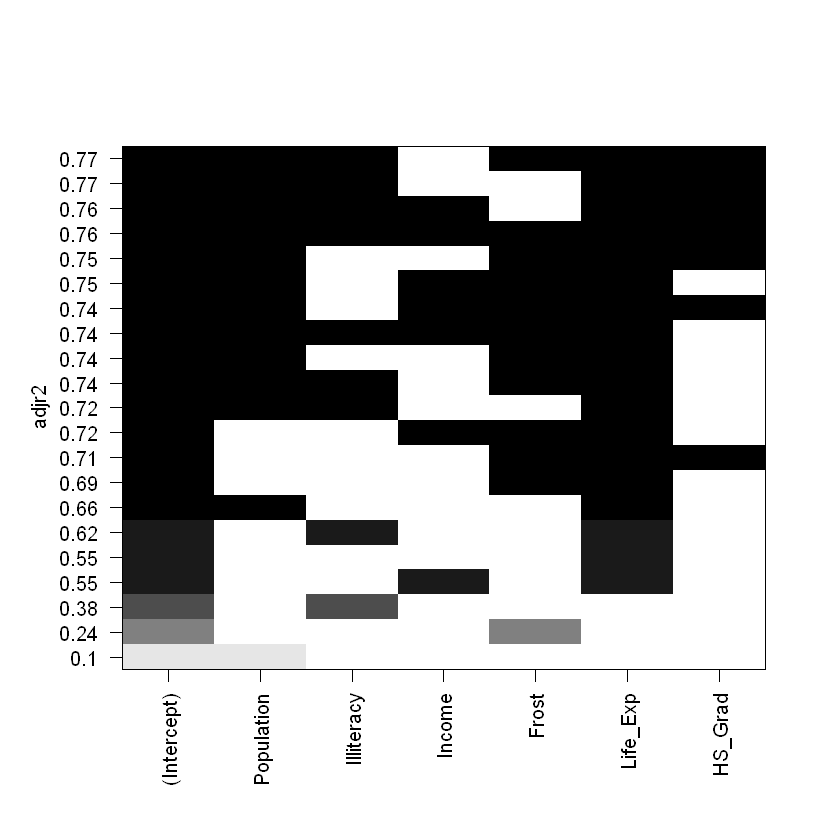

In [334]:
#library(leaps)
leaps <-regsubsets(Murder_sqrt ~ Population + Illiteracy + Income + Frost + Life_Exp + HS_Grad, data=training_data, nbest=4)
plot(leaps, scale="adjr2")

Jumping to the top row, a model with the `intercept`, `Population`, `Illiteracy`, `Life_Exp` and `HS_Grade` has an adjusted R-square of 0.78, whereas one with the `intercept`, `Population`, `Illiteracy`, `Frost`, `Life_Exp` and `HS_Grad` has an adjusted R-square of 0.78. 

Here you see that a model with `intercept`, `Population`, `Illiteracy`, `Life_Exp` and `HS_Grad` is still the best.

Lets examine predicted accuracy.

In [340]:
fit_model <- lm(Murder ~ Population + Illiteracy + Life_Exp + HS_Grad, data=training_data)
fit_model_sqrt <- lm(Murder_sqrt ~ Population + Illiteracy + Life_Exp + HS_Grad, data=training_data)

In [350]:
predicted_murder <- predict(fit_model, testing_data)
predicted_murder_sqrt <- predict(fit_model_sqrt, testing_data)
converted_murder_sqrt <- predicted_murder_sqrt ^2

In [342]:
# make actuals_predicted dataframe.
actuals_predictions <- data.frame(cbind(actuals = testing_data$Murder, predicted = predicted_murder))
head(actuals_predictions)

,actuals,predicted
,<dbl>,<dbl>
Florida,10.7,8.953063
Idaho,5.3,3.605561
Indiana,7.1,6.038288
Kentucky,10.6,8.104348
Louisiana,13.2,14.564172
Maryland,8.5,7.422066


In [351]:
# make actuals_predicted dataframe for sqrt(Murder)
actuals_predictions_sqrt <-  data.frame(cbind(actuals = testing_data$Murder, predicted = converted_murder_sqrt))
head(actuals_predictions_sqrt)

,actuals,predicted
,<dbl>,<dbl>
Florida,10.7,8.541811
Idaho,5.3,3.564880
Indiana,7.1,5.472108
Kentucky,10.6,7.179191
Louisiana,13.2,15.937696
Maryland,8.5,6.823588


In [344]:
correlation_accuracy <- cor(actuals_predictions)
correlation_accuracy

,actuals,predicted
actuals,1.0000000,0.8722871
predicted,0.8722871,1.0000000


The model show us that it has 87% colleration accuracy.

In [349]:
correlation_accuracy <- cor(actuals_predictions_sqrt)
correlation_accuracy

,actuals,predicted
actuals,1.0000000,0.8500702
predicted,0.8500702,1.0000000


The model show us that it has 85% colleration accuracy. Not much difference between both models.

Now we’ll calculate min max accuracy and mean absolute percentage error (MAPE) which is a measure of prediction accuracy.

In [245]:
# Min - max accuracy
min_max_accuracy <- mean(apply(actuals_predictions, 1, min) / apply(actuals_predictions, 1, max))
min_max_accuracy

[1] 0.8311325

The MAPE for the sqrt of Murder model is better.

In [353]:
# Min - max accuracy
min_max_accuracy <- mean(apply(actuals_predictions_sqrt, 1, min) / apply(actuals_predictions_sqrt, 1, max))
min_max_accuracy

[1] 0.8038286

## Residual Standard Error (RSE), or sigma

The RSE estimate gives a measure of error of prediction. The lower the RSE, the more accurate the model (on the data in hand).

The error rate can be estimated by dividing the RSE by the mean outcome variable:

In [254]:
sigma(fit_model)/ mean(testing_data$Murder)

[1] 0.2318302

This estimates an error rate of 2% with the data we have at hand.

In [354]:
sigma(fit_model_sqrt)/ mean(testing_data$Murder)

[1] 0.04667029

In [ ]:
This estimates an error rate of 4% with the data we have at hand.

## Run some output with the final model

Inputs to the MLR model

 - `Murder` = murder and non-negligent manslaughter rate per 100,000 population (1976) - 1.4 to 15.1<br>
 - `Population` = population estimate as of July 1, 1975 (365 - 21198)<br>
 - `Illiteracy` = illiteracy (1970, percent of population) (0.5 - 2.8)<br>
 - `Life_Exp` = life expectancy in years - 67.96 to 73.60<br>
 - `HS_Grad` = percent high-school graduates 37.80 - 67.30<br>


In [247]:
summary(states) # we can quickly see ranges in input data

   Population        Income       Illiteracy      Life_Exp         Murder     
 Min.   :  365   Min.   :3098   Min.   :0.50   Min.   :67.96   Min.   : 1.40  
 1st Qu.: 1058   1st Qu.:3983   1st Qu.:0.60   1st Qu.:70.11   1st Qu.: 4.30  
 Median : 2861   Median :4508   Median :1.00   Median :70.66   Median : 6.90  
 Mean   : 4281   Mean   :4427   Mean   :1.18   Mean   :70.85   Mean   : 7.39  
 3rd Qu.: 4981   3rd Qu.:4809   3rd Qu.:1.60   3rd Qu.:71.87   3rd Qu.:10.70  
 Max.   :21198   Max.   :6315   Max.   :2.80   Max.   :73.60   Max.   :15.10  
    HS_Grad          Frost           name          
 Min.   :37.80   Min.   :  0.0   Length:49         
 1st Qu.:47.80   1st Qu.: 65.0   Class :character  
 Median :53.20   Median :114.0   Mode  :character  
 Mean   :52.89   Mean   :103.2                     
 3rd Qu.:59.00   3rd Qu.:139.0                     
 Max.   :67.30   Max.   :188.0                     

In [255]:
df <- data.frame(Population = c(1000), Illiteracy = c(0.5), Life_Exp = c(70), HS_Grad = c(37))
predicted_murder <- predict(fit_model, df)
predicted_murder

1 
4.171832

Results suggest that for a small population of 1000 with small illiteracy in the population and life expectancy of 70 years and 37% of high school grades, the murder rate per 100,000 population is 4.17%.

In [256]:
df <- data.frame(Population = c(20000), Illiteracy = c(2.5), Life_Exp = c(70), HS_Grad = c(37))
predicted_murder <- predict(fit_model, df)
predicted_murder

1 
15.01317

With higher population and higher levels of illiteracy, same life expectancy and same percent high school grades, the murder rate increases to 15.01%.

In [257]:
df <- data.frame(Population = c(20000), Illiteracy = c(2.5), Life_Exp = c(67), HS_Grad = c(37))
predicted_murder <- predict(fit_model, df)
predicted_murder

1 
20.18193

With lower life expectancy, the murder rate per 100,000 population is 20.18%.

In [258]:
df <- data.frame(Population = c(10000), Illiteracy = c(0.5), Life_Exp = c(70), HS_Grad = c(37))
predicted_murder <- predict(fit_model, df)
predicted_murder

1 
6.424116

With all other measurements being equal, the murder rate is 6.42% per 100,000 population when the population is reduced to 10000 from 20000.

Lets test the model by inputting some real data from the dataset. In this example, I'm inputting the data for Illinois whose murder rate is 10.3%.

In [252]:
df <- data.frame(Population = c(11197), Illiteracy = c(0.9), Life_Exp = c(70.14), HS_Grad = c(52.6))
predicted_murder <- predict(fit_model, df)
predicted_murder

1 
9.362419

In [357]:
df <- data.frame(Population = c(11197), Illiteracy = c(0.9), Life_Exp = c(70.14), HS_Grad = c(52.6))
predicted_murder <- predict(fit_model_sqrt, df)
predicted_murder^2

1 
9.013828

And similarly for a state with small population - Montana with murder of 5%.

In [259]:
df <- data.frame(Population = c(746), Illiteracy = c(0.6), Life_Exp = c(70.56), HS_Grad = c(59.2))
predicted_murder <- predict(fit_model, df)
predicted_murder

1 
5.813844

What is shown by the sqrt of Murder?

In [356]:
df <- data.frame(Population = c(746), Illiteracy = c(0.6), Life_Exp = c(70.56), HS_Grad = c(59.2))
predicted_murder <- predict(fit_model_sqrt, df)
predicted_murder ^2

1 
5.408328